In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
clean_df = pd.read_csv("..\data\cleaned_reviews_with_themes.csv")

clean_df.head()

,review_id,app_id,app_name,rating,review_text,sentiment_label,sentiment_score,theme
0,a7d1c799-ba53-4a0a-a8d6-c5400a009825,com.combanketh.mobilebanking,Combanketh,4,A great app. It's like carrying a bank in your...,positive,0.999293,app_performance
1,64ed5562-1758-4eb8-9291-8b6edc394118,com.combanketh.mobilebanking,Combanketh,4,More than garrantty bank EBC.,positive,0.997196,Other
2,d0c05687-ddd4-43fb-95a9-08f6358d80a2,com.combanketh.mobilebanking,Combanketh,5,really am happy to this app it is Siple to use...,positive,0.998870,general_feedback
3,811bf820-3529-433a-9b6d-e624fa23a16a,com.combanketh.mobilebanking,Combanketh,2,I liked this app. But the User interface is ve...,negative,0.000316,app_performance
4,be2cb2ac-bbe0-4175-81c4-9f6c86afdaaa,com.combanketh.mobilebanking,Combanketh,4,"""Why don’t your ATMs support account-to-accoun...",negative,0.003535,account_access


In [3]:
negative_reviews = clean_df[clean_df["sentiment_label"] == "negative"]["review_text"]

negative_reviews.shape

(2147,)

In [4]:
to_list_negative_reviews = negative_reviews.to_list()
str_negative_reviews = " ".join(to_list_negative_reviews)
wordcloud = WordCloud().generate(str_negative_reviews)
wordcloud

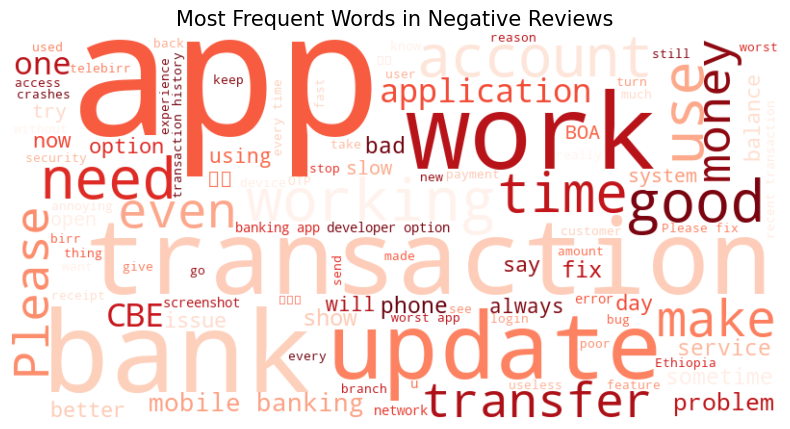

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

to_list_negative_reviews = negative_reviews.tolist()
str_negative_reviews = " ".join(to_list_negative_reviews)

wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',  
    colormap='Reds',          
    stopwords=None,           
    max_words=100             
).generate(str_negative_reviews)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Most Frequent Words in Negative Reviews", fontsize=15)
plt.show()

In [8]:
import nltk

# Download essential resources
nltk.download('punkt')       # Tokenizer models
nltk.download('stopwords')   # Stopwords list
nltk.download('wordnet')     # For lemmatization
nltk.download('omw-1.4')     # Required for WordNet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', text)
    
    # 3. Remove punctuation and numbers
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\d+', '', text)
    
    # 4. Tokenize (using regex if NLTK fails)
    tokens = re.findall(r'\b\w+\b', text)
    
    # 5. Remove stopwords and short words
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    
    # 6. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return " ".join(tokens)

In [17]:
clean_negative_reviews = preprocess_text(str_negative_reviews).split()

from collections import Counter

word_freq = Counter(clean_negative_reviews)

words = word_freq.keys()
frequencies = word_freq.values()

word_freq_df = pd.DataFrame(
    {
        "word": words, 
        "frequency": frequencies
    }
)

word_freq_df.sort_values(by="frequency", ascending=False, inplace=True)

word_freq_df.head(20)

,word,frequency
1,app,889
72,bank,262
98,transaction,250
129,update,228
160,work,216
190,time,185
146,working,177
235,please,169
68,doesnt,163
127,account,149


<Axes: xlabel='word', ylabel='frequency'>

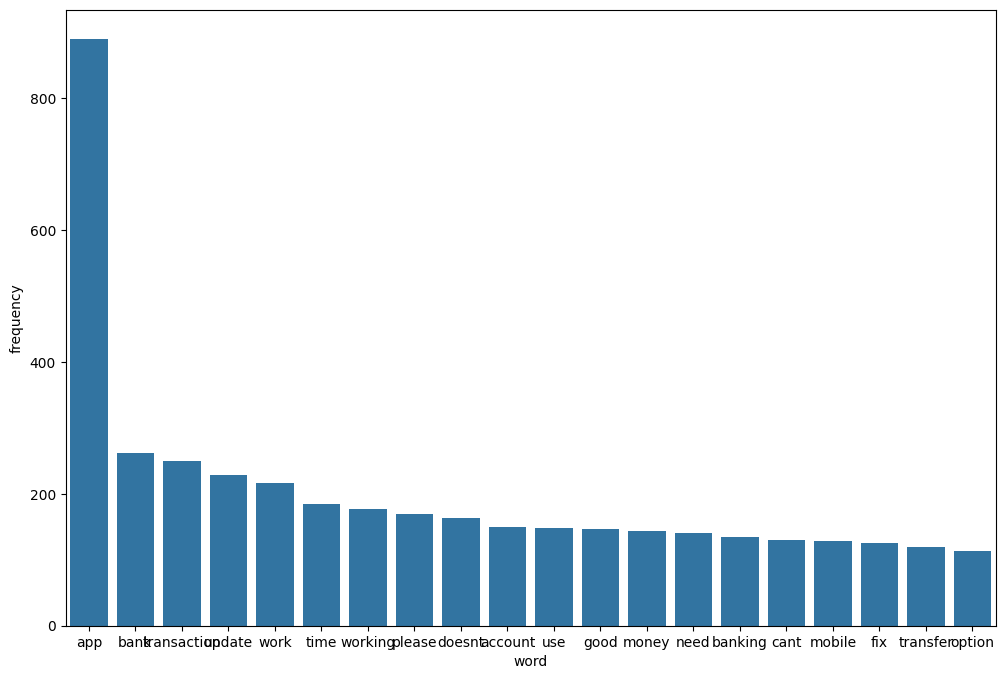

In [ ]:
plt.figure(figsize=(12, 8))

sns.barplot(
    data=word_freq_df.head(20), 
    x="word", 
    y="frequency"
)
# negative sentiment
plt.title()

In [39]:
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from wordcloud import WordCloud

class NGramAnalyzer:
    def __init__(self):
        self._download_nltk_resources()
        self.stop_words = set(stopwords.words('english'))
        
    def _download_nltk_resources(self):
        """Ensure all required NLTK data is downloaded"""
        nltk.download('punkt') 
        nltk.download("punkt_tab")
        nltk.download('stopwords')   # Stopwords list
        nltk.download('wordnet')     # For lemmatization
        nltk.download('omw-1.4')

        
    def preprocess(self, text, keep_stopwords = False):
        try:
            text = text.lower()
            text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', text)
    
            text = text.translate(str.maketrans('', '', string.punctuation))
            text = re.sub(r'\d+', '', text)
            
            tokens = re.findall(r'\b\w+\b', text)
            # if not keep_stopwords:
            tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
            
            tokens = [lemmatizer.lemmatize(word) for word in tokens]
            
            return tokens
        except Exception as e:
            print(f"Tokenization error: {e}")
            return []

    def get_ngrams(self, texts, n=1, top_k=20):
        """Extract n-grams with frequencies"""
        all_ngrams = []
        for text in texts:
            tokens = self.preprocess(text, keep_stopwords= n > 1)
            all_ngrams.extend(list(ngrams(tokens, n)))
        return Counter(all_ngrams).most_common(top_k)
    
    def analyze(self, texts, visualize=True):
        """Complete analysis pipeline"""
        # Get all n-grams
        results = {
            'unigrams': self.get_ngrams(texts, n=1),
            'bigrams': self.get_ngrams(texts, n=2),
            'trigrams': self.get_ngrams(texts, n=3)
        }
        
        # Visualization
        if visualize:
            for n, label in [(1, "Unigrams"), (2, "Bigrams"), (3, "Trigrams")]:
                self._plot_ngrams(results[f'{label.lower()}'], f"Top {label}")
            self._generate_wordcloud(texts)
        
        return results
    
    def _plot_ngrams(self, ngram_counts, title):
        """Bar plot for n-grams"""
        if not ngram_counts:
            return
            
        df = pd.DataFrame(ngram_counts, columns=['Phrase', 'Count'])
        df['Phrase'] = df['Phrase'].apply(lambda x: ' '.join(x) if isinstance(x, tuple) else x)
        df.plot.barh(x='Phrase', y='Count', title=title, figsize=(8, 4))
        plt.tight_layout()
        plt.show()
    
    def _generate_wordcloud(self, texts):
        """Word cloud for unigrams"""
        all_text = ' '.join([' '.join(self.preprocess(t)) for t in texts])
        if not all_text.strip():
            return
            
        wordcloud = WordCloud(width=800, height=400, 
                             background_color='white',
                             colormap='viridis').generate(all_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title("Word Frequency Cloud", pad=20)
        plt.show()

## The Negative Reviews the frequency words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\segni\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


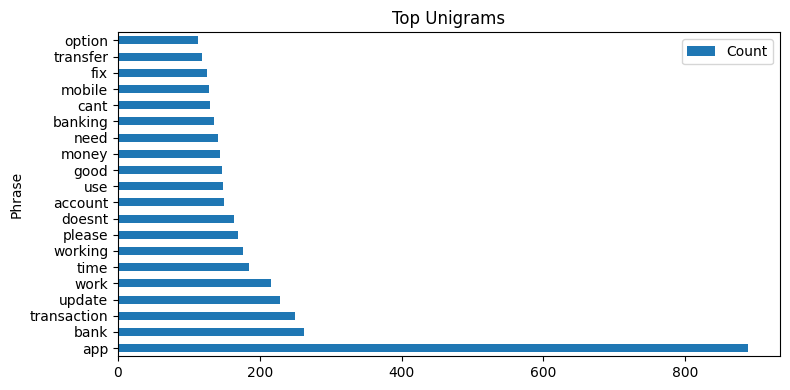

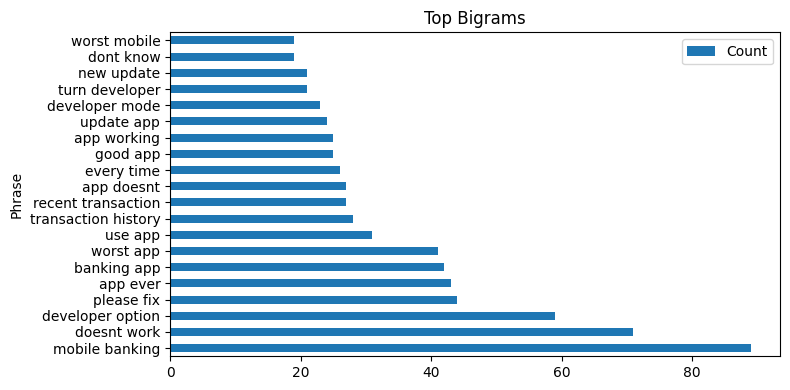

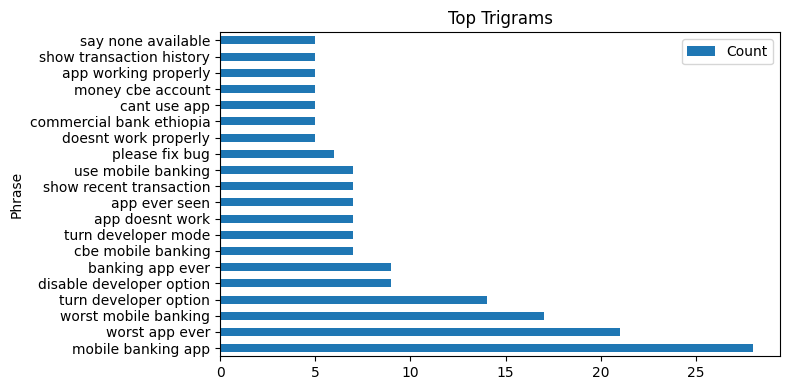

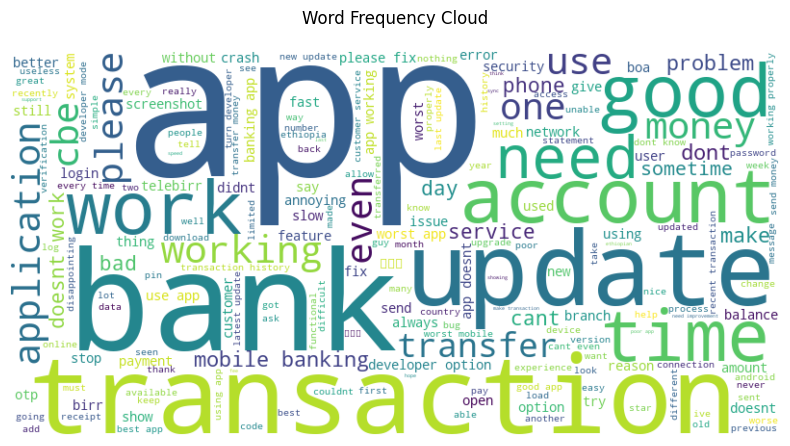


Top unigrams:
app: 889
bank: 262
transaction: 250
update: 228
work: 216
time: 185
working: 177
please: 169
doesnt: 163
account: 149
use: 148
good: 147
money: 144
need: 141
banking: 135
cant: 130
mobile: 129
fix: 126
transfer: 119
option: 113

Top bigrams:
mobile banking: 89
doesnt work: 71
developer option: 59
please fix: 44
app ever: 43
banking app: 42
worst app: 41
use app: 31
transaction history: 28
recent transaction: 27
app doesnt: 27
every time: 26
good app: 25
app working: 25
update app: 24
developer mode: 23
turn developer: 21
new update: 21
dont know: 19
worst mobile: 19

Top trigrams:
mobile banking app: 28
worst app ever: 21
worst mobile banking: 17
turn developer option: 14
disable developer option: 9
banking app ever: 9
cbe mobile banking: 7
turn developer mode: 7
app doesnt work: 7
app ever seen: 7
show recent transaction: 7
use mobile banking: 7
please fix bug: 6
doesnt work properly: 5
commercial bank ethiopia: 5
cant use app: 5
money cbe account: 5
app working properl

In [40]:
analyzer = NGramAnalyzer()
results = analyzer.analyze(to_list_negative_reviews)

for ngram_type, counts in results.items():
    print(f"\nTop {ngram_type}:")
    for phrase, count in counts:
        print(f"{' '.join(phrase) if isinstance(phrase, tuple) else phrase}: {count}")

## **Compare Banks based negative**

In [41]:
cbe_negative_reviews = clean_df[
    (clean_df["app_name"] == "Combanketh") & (clean_df["sentiment_label"] == "negative")
]["review_text"].to_list()

dashen_negative_reviews = clean_df[
    (clean_df["app_name"] == "Dashen") & (clean_df["sentiment_label"] == "negative")
]["review_text"].to_list()

boa_negative_reviews = clean_df[
    (clean_df["app_name"] == "Boa") & (clean_df["sentiment_label"] == "negative")
]["review_text"].to_list()


## **Negative reviews for CBE**

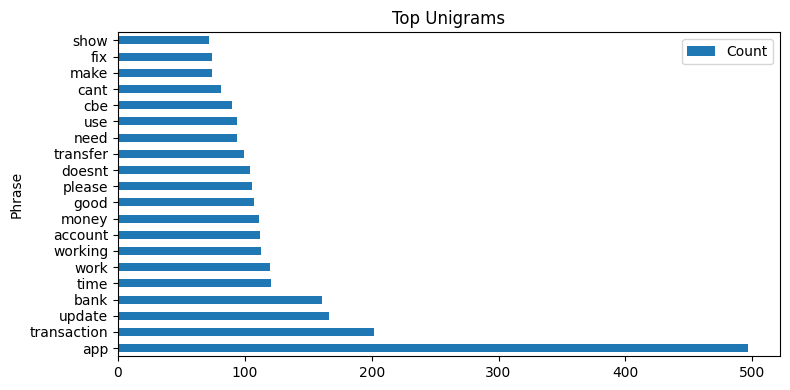

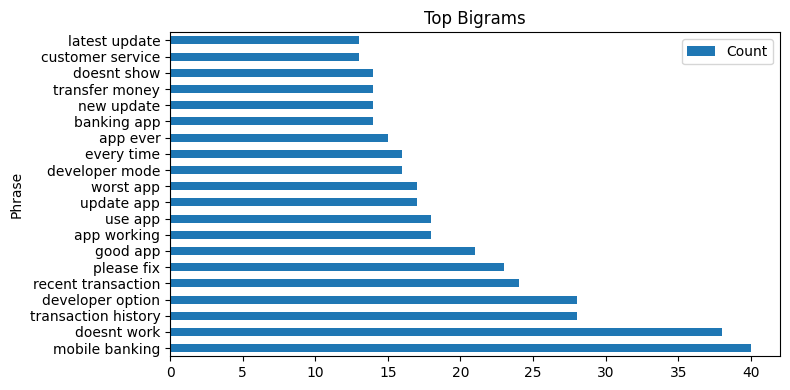

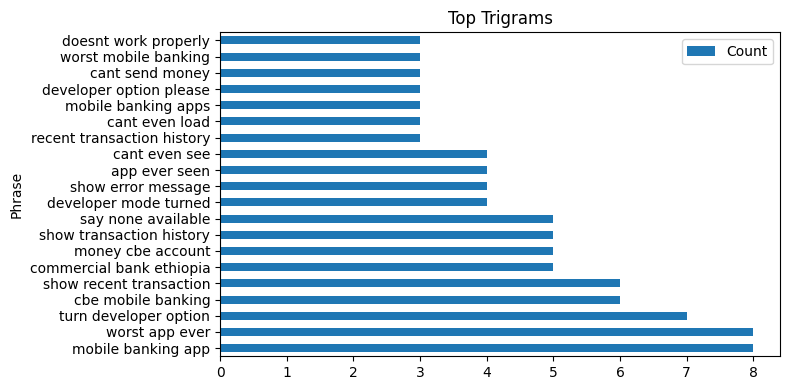

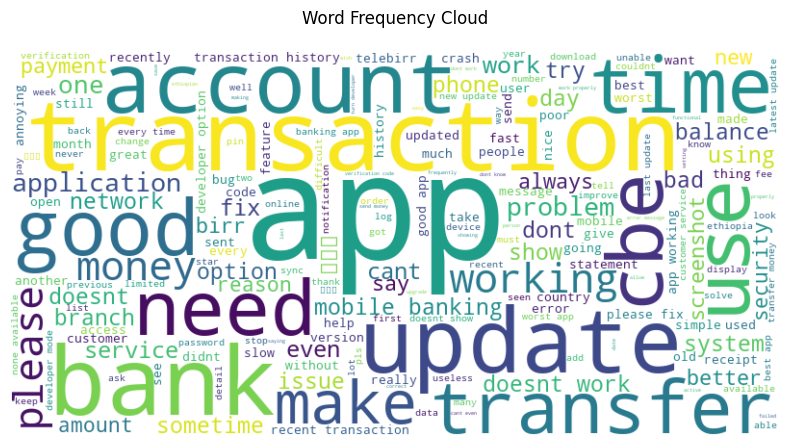

In [43]:
cbe_negative_result = analyzer.analyze(cbe_negative_reviews)

## **Negative reviews for Dashen**

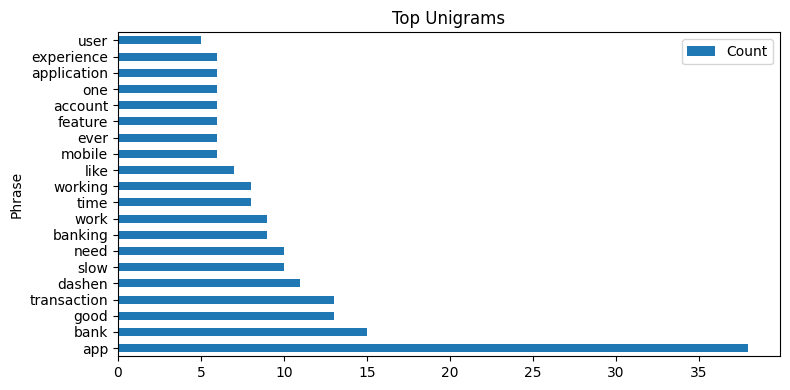

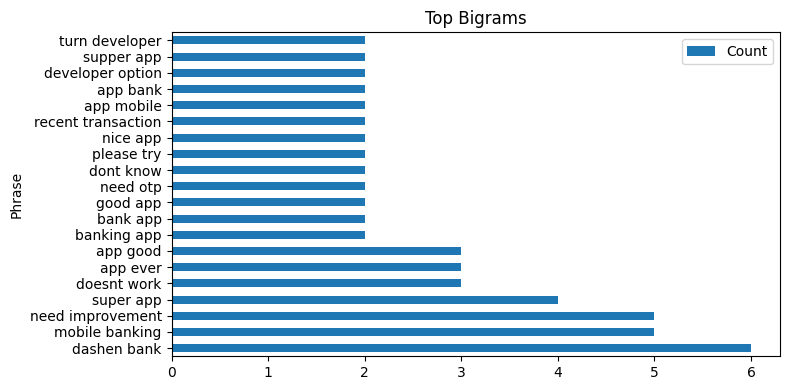

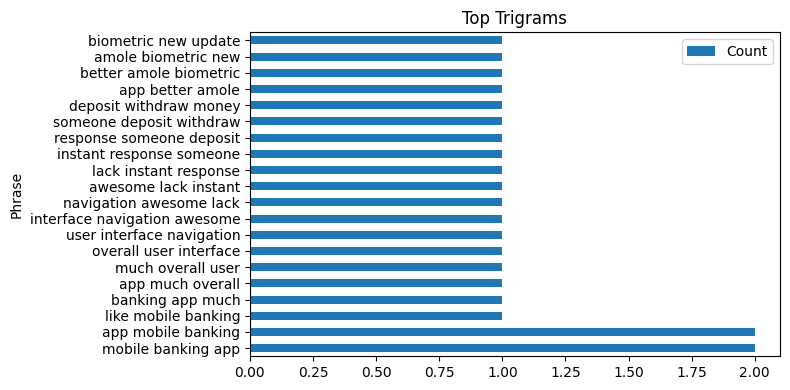

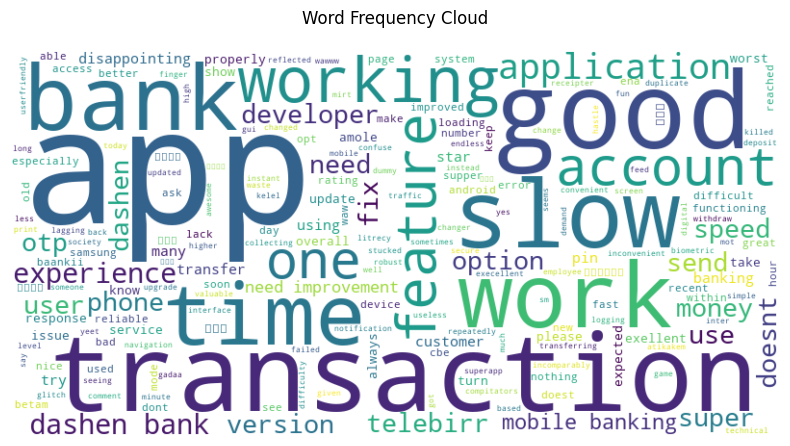

In [44]:
dashen_negative_result = analyzer.analyze(dashen_negative_reviews)

## **Negative reviews for BOA**

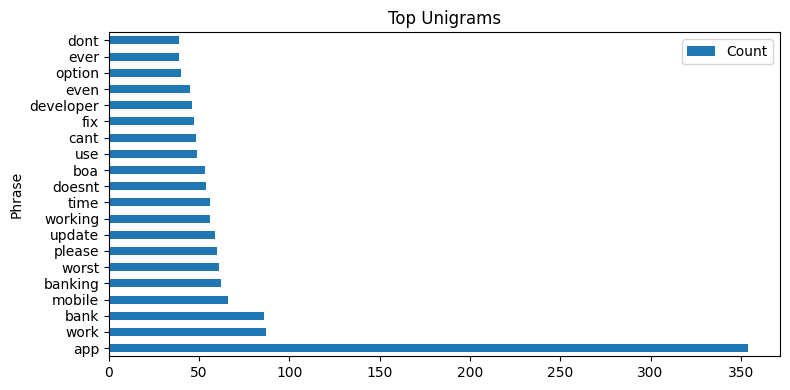

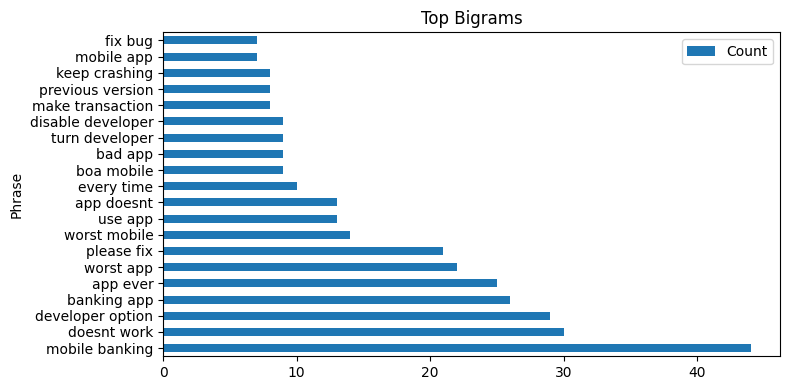

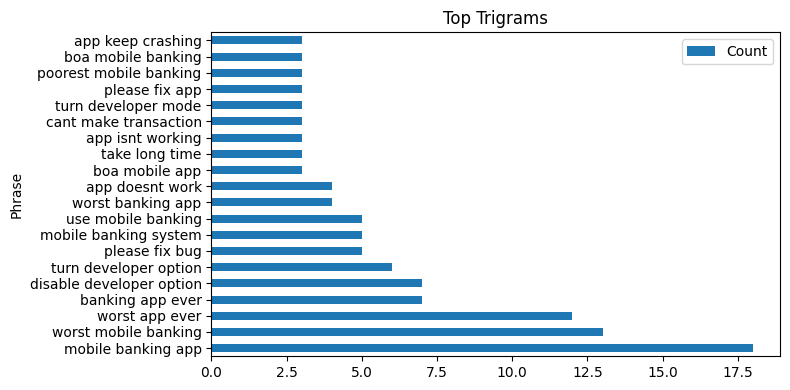

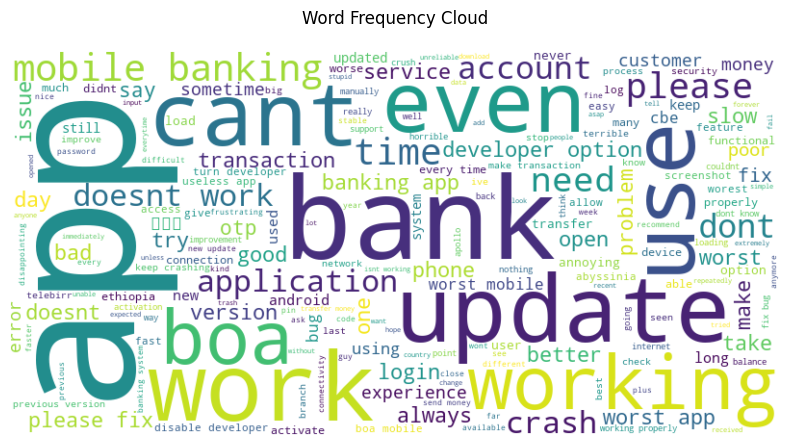

In [45]:
boa_negative_result = analyzer.analyze(boa_negative_reviews)



### 🔢 **Review Data Size Summary** (based on the top 20 frequent phrases)

| App        | Total Negative Reviews |
| ---------- | ---------------------- |
| **CBE**    | 5,000                  |
| **BOA**    | 1,024                  |
| **Dashen** | 424                    |

> **Note**: The raw counts should be normalized before comparison, but we'll analyze both raw and proportional frequencies.

---

### 🧩 Step 1: Merge Similar Phrases (Manual Grouping)

Here's a grouped version of semantically similar phrases:

#### 🟥 Complaints about App Quality & Experience

| Merged Theme                    | Included Phrases                                                                                                                        |
| ------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------- |
| **"Worst app experience"**      | worst app ever, worst mobile banking, worst banking app, poorest mobile banking, app doesn’t work, app isn’t working, app keep crashing |
| **"Doesn’t function properly"** | doesn’t work properly, can’t make/send transaction, can’t even load, can’t even see                                                     |

#### 🟧 Developer Mode/Options

| Merged Theme                  | Included Phrases                                                                                |
| ----------------------------- | ----------------------------------------------------------------------------------------------- |
| **"Developer option issues"** | turn developer option, disable developer option, developer mode turned, developer option please |

#### 🟨 Transaction & Performance Issues

| Merged Theme                     | Included Phrases                                                                                                                         |
| -------------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------- |
| **"Transaction issues"**         | show recent transaction, recent transaction history, show transaction history, show error message, say none available, money CBE account |
| **"Performance lag / slowness"** | take long time, lack instant response, slow transaction processing                                                                       |

#### 🟩 Positive Notes

| Merged Theme                   | Included Phrases                              |
| ------------------------------ | --------------------------------------------- |
| **"Good interface or design"** | user interface navigation, navigation awesome |
| **"Better than Amole"**        | app better amole                              |

---

### 📊 Step 2: Thematic Count Comparison (Based on Merged Categories)

| Theme                     | CBE (5k)           | BOA (1k)               | Dashen (424) | Notes                                                        |
| ------------------------- | ------------------ | ---------------------- | ------------ | ------------------------------------------------------------ |
| Worst app experience      | 8+3+4+4+3 = **22** | 13+12+4+3+3+3 = **38** | 1            | BOA receives highest proportion of "worst" complaints.       |
| Developer option issues   | 7+4+3 = **14**     | 6+7+3 = **16**         | —            | CBE and BOA both heavily criticized for this.                |
| Transaction issues        | 6+6+5+5+3 = **25** | 5                      | 2            | CBE dominates complaints about missing/failing transactions. |
| Doesn’t function properly | 3+3 = **6**        | 3+3+4 = **10**         | 1            | Again, BOA slightly more criticized per review volume.       |
| Performance lag/slowness  | —                  | 3                      | 2+1 = **3**  | Dashen has proportionally more complaints about slowness.    |
| Good interface / design   | —                  | —                      | 1            | Only Dashen receives a minor positive mention.               |
| Better than Amole         | —                  | —                      | 1            | Indicates a comparative user perspective.                    |

---

### 📈 Step 3: Proportional (Per 1,000 Reviews) Theme Intensity

| Theme                   | CBE (/1k) | BOA (/1k) | Dashen (/1k) |
| ----------------------- | --------- | --------- | ------------ |
| Worst app experience    | 4.4       | **37.1**  | 2.4          |
| Developer option issues | 2.8       | **15.6**  | 0.0          |
| Transaction issues      | **5.0**   | 4.9       | 4.7          |
| Doesn’t work properly   | 1.2       | **9.8**   | 2.4          |
| Performance/slowness    | 0.0       | 2.9       | **7.0**      |
| Positive notes          | 0.0       | 0.0       | 4.7          |

---

### 🧠 Insights & Conclusions

1. **BOA** has the **highest relative dissatisfaction**, especially with:

   * General app quality.
   * Developer option issues.
   * Frequent crashes and bugs.

2. **CBE** leads in **transaction-related issues**, particularly:

   * Users can't view transaction history.
   * Issues with CBE account visibility.
   * Error messages or data not available.

3. **Dashen** has the **fewest reviews**, and while mostly negative:

   * Complaints center on **performance and response time**.
   * Some users **appreciate UI/navigation**, mentioning it's better than Amole.

---

### ✅ Recommendations for Each App

* **CBE**: Improve data visibility, transparency, and reliability of transaction history.
* **BOA**: Prioritize UI/UX overhauls, bug fixes, and prevent developer mode crashes.
* **Dashen**: Optimize performance and consider positive feedback on UI to differentiate.


# Create 3–5 plots (Matplotlib, Seaborn): sentiment trends, rating distributions, keyword clouds.

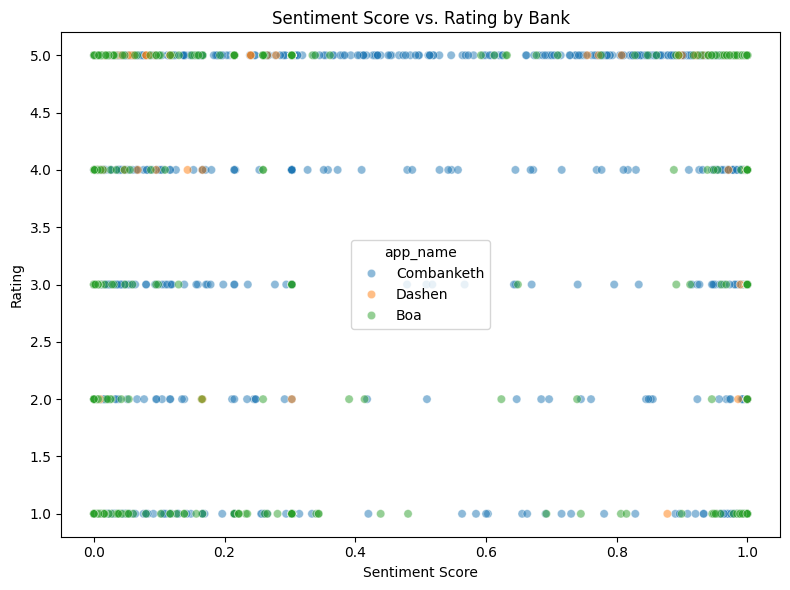

In [58]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=clean_df,
    x='sentiment_score',
    y='rating',
    hue='app_name',
    alpha=0.5
)
plt.title("Sentiment Score vs. Rating by Bank")
plt.xlabel("Sentiment Score")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

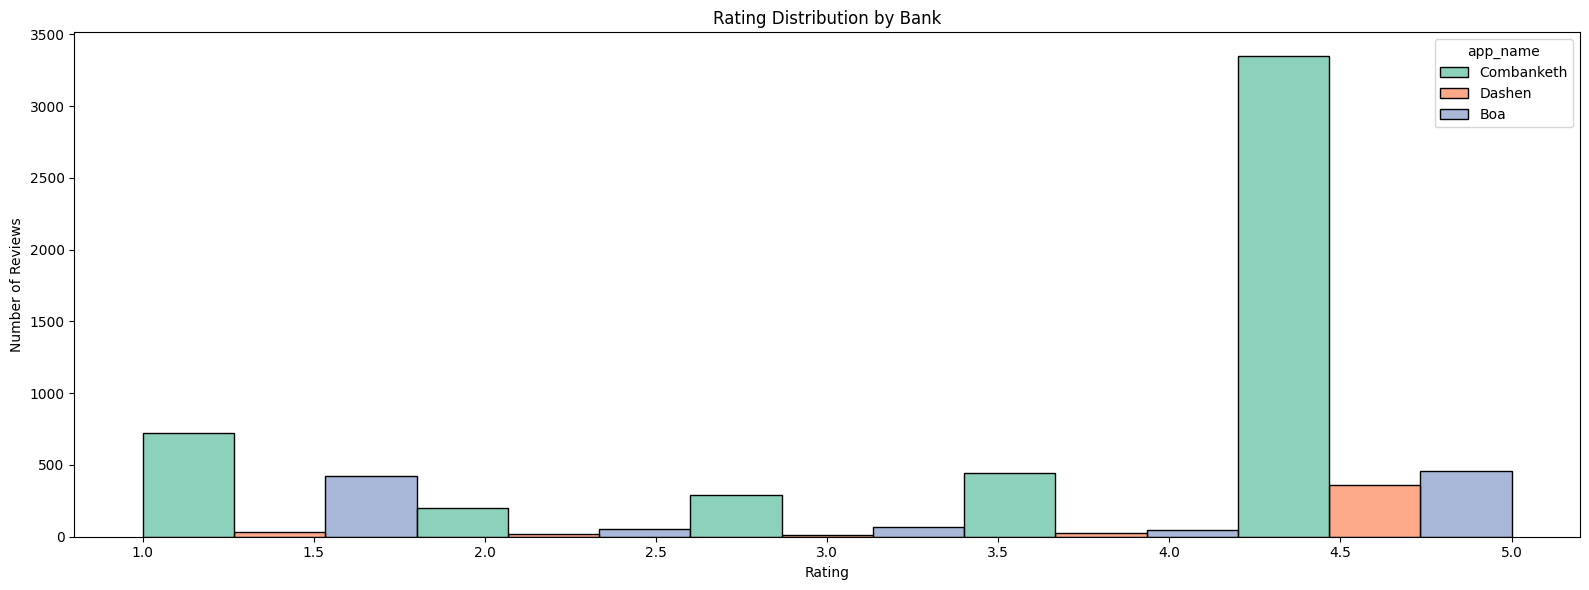

In [57]:
plt.figure(figsize=(16,6))
sns.histplot(
    data=clean_df,
    x='rating',
    hue='app_name',
    multiple='dodge',
    bins=5,
    palette='Set2'
)
plt.title("Rating Distribution by Bank")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()


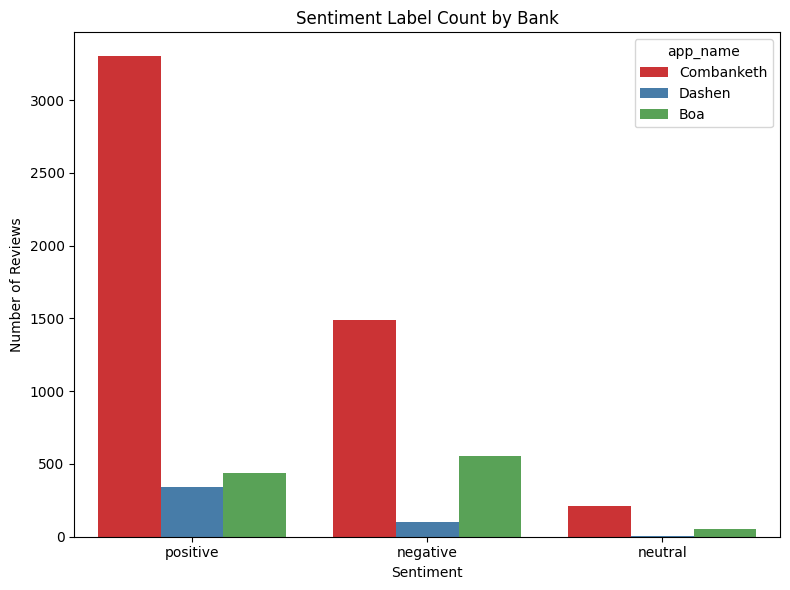

In [54]:
plt.figure(figsize=(8,6))
sns.countplot(
    data=clean_df,
    x='sentiment_label',
    hue='app_name',
    palette='Set1'
)
plt.title("Sentiment Label Count by Bank")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()

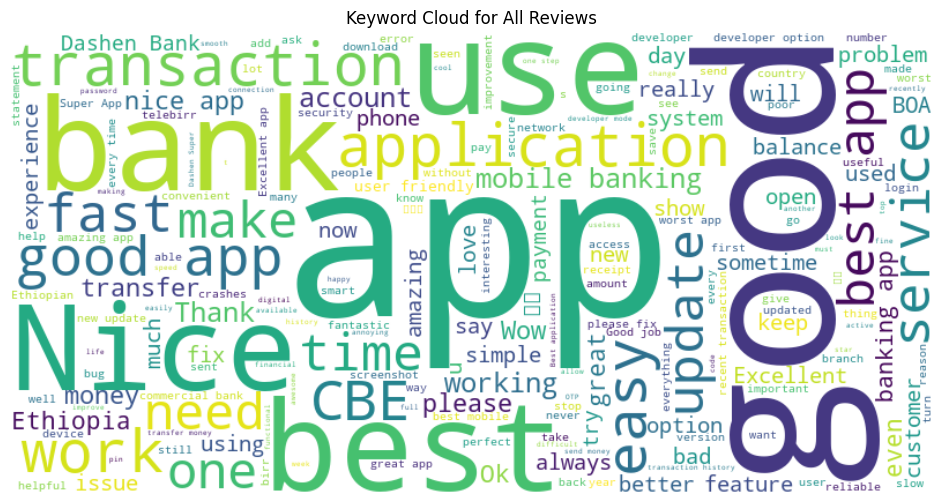

In [55]:
from wordcloud import WordCloud

all_reviews = " ".join(clean_df['review_text'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Keyword Cloud for All Reviews")
plt.show()

C:\Users\segni\AppData\Local\Temp\ipykernel_19408\170230004.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


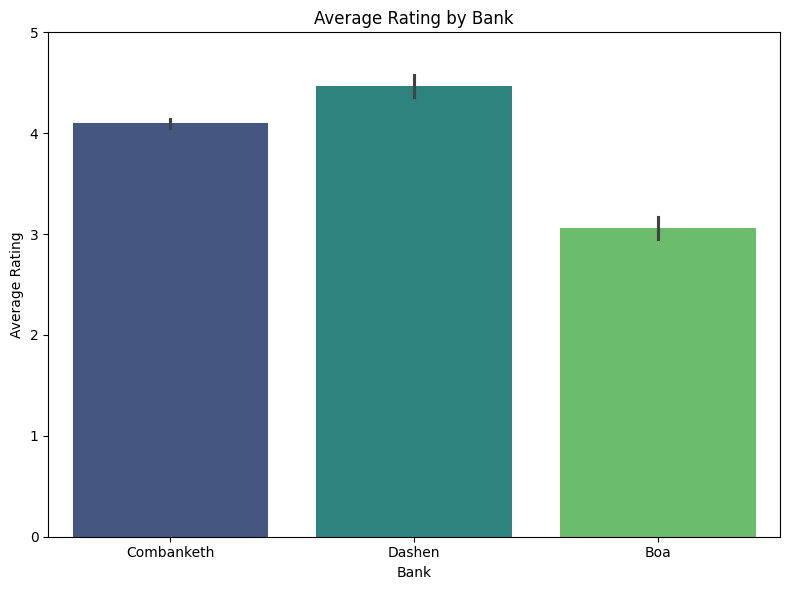

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=clean_df,
    x='app_name',
    y='rating',
    palette='viridis'
)
plt.title("Average Rating by Bank")
plt.xlabel("Bank")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

C:\Users\segni\AppData\Local\Temp\ipykernel_19408\2857925942.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


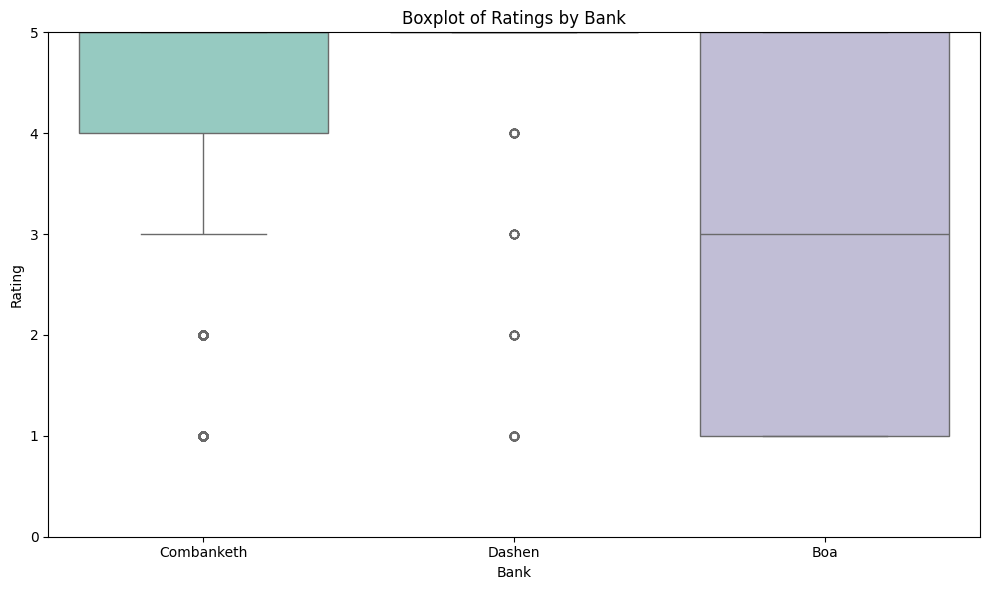

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=clean_df,
    x='app_name',
    y='rating',
    palette='Set3'
)
plt.title("Boxplot of Ratings by Bank")
plt.xlabel("Bank")
plt.ylabel("Rating")
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

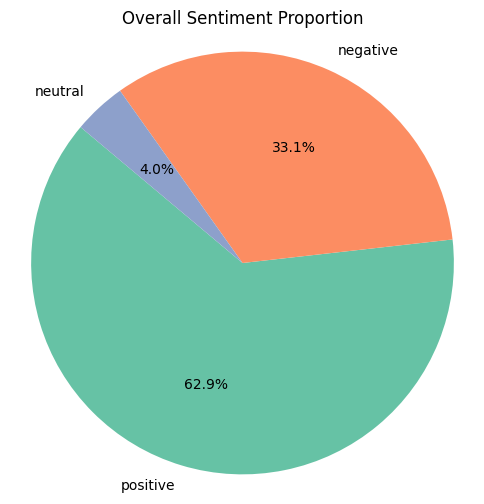

In [60]:
sentiment_counts = clean_df['sentiment_label'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('Set2')
)
plt.title("Overall Sentiment Proportion")
plt.axis('equal')
plt.show()

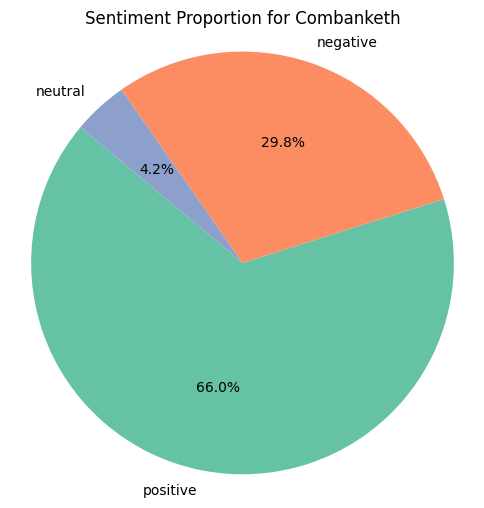

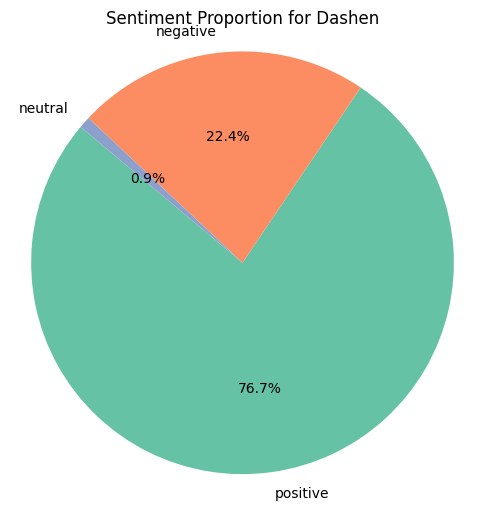

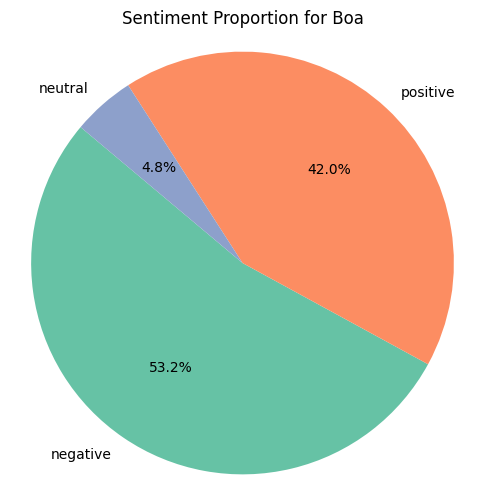

In [67]:
for app_name in ["Combanketh", "Dashen", "Boa"]:
    df = clean_df[clean_df["app_name"] == app_name]
    sentiment_counts = df['sentiment_label'].value_counts()
    plt.figure(figsize=(6,6))
    plt.pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=sns.color_palette('Set2')
    )
    plt.title(f"Sentiment Proportion for {app_name}")
    plt.axis('equal')
    plt.show()

In [65]:
clean_df.app_name.value_counts()

app_name
Combanketh    5000
Boa           1044
Dashen         450
Name: count, dtype: int64